多个面作图
画出带电体的形状
如何把颜色画出梯度

In [56]:
%reset -f
import numpy as np
from Helmholtz import Initial,Iteration
def f1(x,y,z):
    '''放在(0,0,0)处的点电荷'''
    if x==xlist[Nx//2] and y==ylist[Ny//2] and z==zlist[Nz//2]:
        Q,epsilon=1,1
        rho=Q/deltaq**3
        f=-rho/epsilon#注意q!=rho,应除以deltaq的三次方,注意负号
        return f
    else:
        return 0
def f2(x,y,z):
    '''电偶极子'''
    condition1=x==xlist[Nx//2] and y==ylist[Ny//2+1] and z==zlist[Nz//2]
    condition2=x==xlist[Ny//2] and y==ylist[Ny//2-1] and z==zlist[Nz//2]
    if condition1 or condition2:
        Q,epsilon=1,1
        rho=Q/deltaq**3
        if condition1:
            f=-rho/epsilon
        else:
            f=rho/epsilon
        return f
    else:
        return 0
def f3(x,y,z):
    '''中心在(0,0,0)的带电正方体
    特别地,当a=2时退化为点电荷'''
    a=6#正方体边长,必须为整数
    condition1=x>xlist[Nx//2-a//2] and x<xlist[Nx//2+a//2]
    condition2=y>ylist[Ny//2-a//2] and y<ylist[Ny//2+a//2]
    condition3=z>zlist[Nz//2-a//2] and z<zlist[Nz//2+a//2]
    if condition1 and condition2 and condition3:
        Q,epsilon=1,1
        rho=Q/(a*deltaq)**3
        f=-rho/epsilon
        return f
    else:
        return 0
def g(x,y,z):
    return 0
def set_Boundary(x,y,z,cell):#cell参数不能改动
    '''边界条件函数'''
    R=np.sqrt(x**2+y**2+z**2)
    if R>xN:#xN在主程序中给出
        cell.set_value(0)
        cell.set_is_iterate(False)
    return
def analy():
    Q=1
    epsilon=1
    Coefficient=1/4/np.pi/epsilon
    result=Q*Coefficient*(np.divide(1,xlist[Nx//2:])-1/xN)
    return result
#初始化参数
tN=50#迭代次数
x0,xN=-1,1
y0,yN=-1,1
z0,zN=-1,1
deltaq=0.05
#创建坐标值网格点,方便找到特定位置的索引从而设置边界条件
xlist=np.arange(x0,xN,deltaq)
ylist=np.arange(y0,yN,deltaq)
zlist=np.arange(z0,zN,deltaq)
Nx,Ny,Nz=len(xlist),len(ylist),len(zlist)
#对数据进行操作
beta=2/(1+np.pi/len(xlist))#beta=1.8#若β不等于1那么图像就不对称了，特别当β较大时
UMatCell=Initial(xlist=xlist,ylist=ylist,zlist=zlist,set_Boundary=set_Boundary)#元胞堆叠初始化
UMatValue=Iteration(xlist=xlist,ylist=ylist,zlist=zlist,tN=tN,UMatCell=UMatCell,f=f2,g=g,beta=beta)#迭代元胞

deltaU=2.748097e-05
deltaU=9.828294e-06
deltaU=3.620613e-05
deltaU=2.053779e-05
deltaU=5.659744e-07


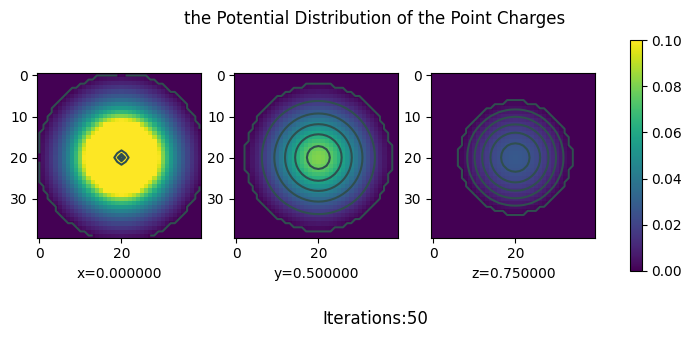

In [43]:
# 作图
import matplotlib.pyplot as plt
from matplotlib import colors
norm=colors.Normalize(vmin=0,vmax=0.1)
fig,axes=plt.subplots(1,3,figsize=(9,3))
fig.suptitle('the Potential Distribution of the Point Charges')
fig.supxlabel('Iterations:%d'%tN,y=-0.08)
index_x,index_y,index_z=Nx//2,Ny//2+10,Nz//2+15
draw0=axes[0].imshow(UMatValue[index_x,:,:],norm=norm)
axes[0].contour(UMatValue[index_x,:,:],5,colors='darkslategray')
axes[0].set_xlabel('x=%f'%xlist[index_x])
draw1=axes[1].imshow(UMatValue[:,index_y,:],norm=norm)
axes[1].set_xlabel('y=%f'%ylist[index_y])
axes[1].contour(UMatValue[:,index_y,:],5,colors='darkslategray')
draw2=axes[2].imshow(UMatValue[:,:,index_z],norm=norm)
axes[2].contour(UMatValue[:,:,index_z],5,colors='darkslategray')
axes[2].set_xlabel('z=%f'%zlist[index_z])
fig.colorbar(draw2,ax=[axes[0],axes[1],axes[2]])#共用一个图标
plt.show()

接地导体球中心放置一点电荷时，导体球内部的电势分布解析解为：
$$\phi=\frac{q}{r}-\frac{q}{R}$$

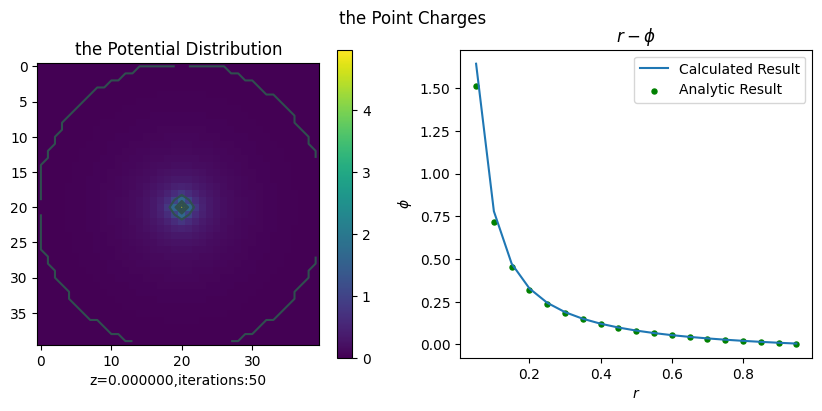

In [44]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,2,figsize=(10,4))
fig.suptitle('the Point Charges')
index=Nz//2
nep=axes[0].imshow(UMatValue[:,:,index])
axes[0].contour(UMatValue[:,:,index],5,colors='darkslategray')
axes[0].set_title('the Potential Distribution')
axes[0].set_xlabel('z=%f,iterations:%d'%(zlist[index],tN))
fig.colorbar(nep,ax=axes[0])
analy_result=analy()
tmp=1
Range=xlist[Nx//2+tmp:]
axes[1].plot(Range,UMatValue[Nx//2+tmp:,Ny//2,Nz//2],label='Calculated Result')
axes[1].scatter(Range,analy_result[tmp:],label='Analytic Result',s=13,c='g')
axes[1].set_ylabel('$\phi$')
axes[1].set_xlabel('$r$')
axes[1].set_title('$r-\phi$')
plt.legend()
plt.show()

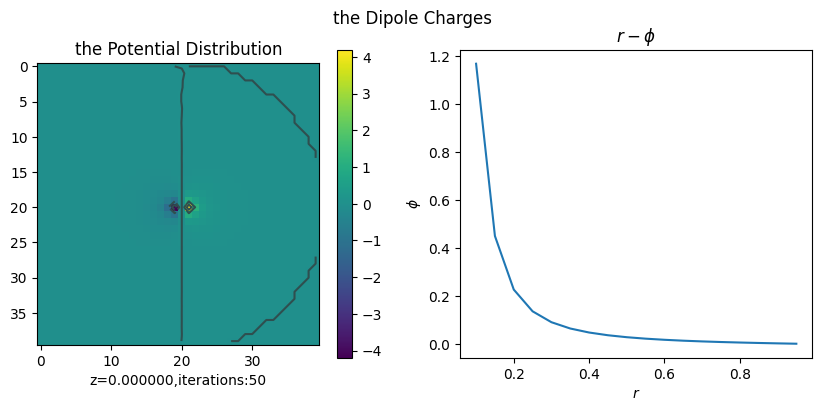

In [57]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,2,figsize=(10,4))
fig.suptitle('the Dipole Charges')
index=Nz//2
nep=axes[0].imshow(UMatValue[:,:,index])
axes[0].set_title('the Potential Distribution')
axes[0].set_xlabel('z=%f,iterations:%d'%(zlist[index],tN))
axes[0].contour(UMatValue[:,:,index],5,colors='darkslategray')
fig.colorbar(nep,ax=axes[0])
tmp=2#从零处的值很大,需要截断
Range=xlist[Nx//2+tmp:]
axes[1].plot(Range,UMatValue[Nx//2,Ny//2+tmp:,Nz//2])#Uy方向才具有较好的对称性
axes[1].set_ylabel('$\phi$')
axes[1].set_xlabel('$r$')
axes[1].set_title('$r-\phi$')
plt.show()

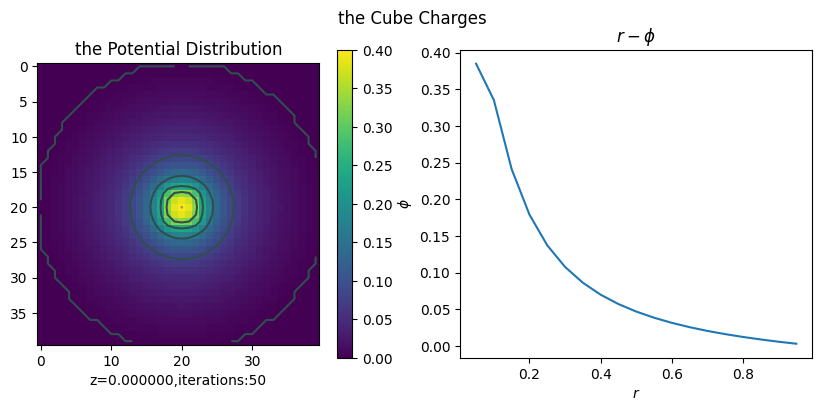

In [49]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,2,figsize=(10,4))
fig.suptitle('the Cube Charges')
index=Nz//2
nep=axes[0].imshow(UMatValue[:,:,index])
axes[0].contour(UMatValue[:,:,index],5,colors='darkslategray')
axes[0].set_title('the Potential Distribution')
axes[0].set_xlabel('z=%f,iterations:%d'%(zlist[index],tN))
fig.colorbar(nep,ax=axes[0])
tmp=1
Range=xlist[Nx//2+tmp:]
axes[1].plot(Range,UMatValue[Nx//2+tmp:,Ny//2,Nz//2])
axes[1].set_ylabel('$\phi$')
axes[1].set_xlabel('$r$')
axes[1].set_title('$r-\phi$')
plt.show()